### Machine Learning Class 1

In [68]:
''' Import all library '''
import pandas as pd
import numpy as np
import os 

In [69]:
''' Dataset Path '''

Root_Path = 'C:\\Users\\mdmes\\OneDrive\\Desktop\\Pandas Data'
Data_Path = os.path.join(Root_Path, 'house_data.csv')

house_data=pd.read_csv(
    Data_Path 
)

house_data.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


### Step-1: Parameter / Weight initialization

In [70]:
per_score_price = np.random.randint(1,1000000)
registration_cost = np.random.randint(1,1000000)

print(per_score_price)
print(registration_cost)

485007
965426


### Step-2: Define ML Algoritham

In [71]:
def house_price(area, per_score_price, registration_cost):
    predict_price = (area * per_score_price) + registration_cost
    return predict_price

house_price(
    area=7420,
    per_score_price=per_score_price,
    registration_cost=registration_cost
)

3599717366

### Step-3: Predict the result

In [72]:
house_data['Predicted_Price'] = house_data['area'].apply(
    lambda area : house_price(
        area=area,
        per_score_price=per_score_price,
        registration_cost=registration_cost
    )
)

house_data.head()

,area,price,Predicted_Price
0,7420,13300000,3599717366
1,8960,12250000,4346628146
2,9960,12250000,4831635146
3,7500,12215000,3638517926
4,7420,11410000,3599717366


### Step-4: Compaire Actual result to predicted result by Plot

In [73]:
x = []
y = [] 
y_true = []

for i in range(len(house_data)):
    x.append(house_data['area'].iloc[i])
    y.append(house_data['price'].iloc[i])
    y_true.append('y_true')

    x.append(house_data['area'].iloc[i])
    y.append(house_data['Predicted_Price'].iloc[i])
    y_true.append('y_predict')

house_data = pd.DataFrame({
    'area':np.array(x),
    'price':np.array(y),
    'Predicted_Price':np.array(y_true)
})

house_data.head()

,area,price,Predicted_Price
0,7420,13300000,y_true
1,7420,3599717366,y_predict
2,8960,12250000,y_true
3,8960,4346628146,y_predict
4,9960,12250000,y_true


In [74]:
import seaborn as sns


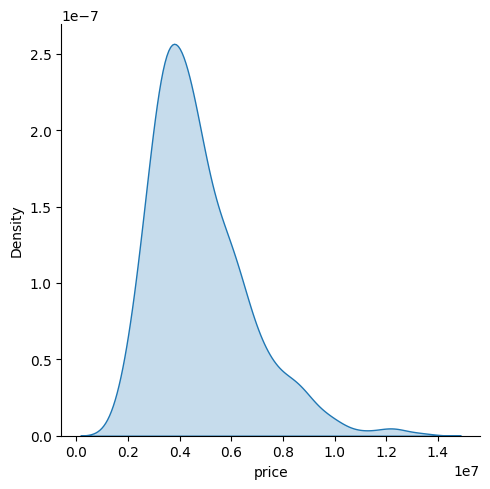

In [75]:
sns.displot(
    data=house_data.query("Predicted_Price == 'y_true'"),
    x='price',
    kind='kde',
    fill=True
)

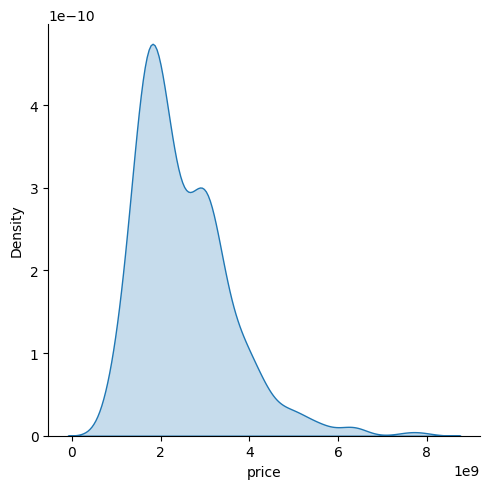

In [76]:
sns.displot(
    data=house_data.query("Predicted_Price == 'y_predict'"),
    x='price',
    kind='kde',
    fill=True
)

In [77]:
''' KL Divergence '''
from scipy.stats import entropy


def Calculate_KL_Divergence(house_data, small_num=1e-10, max_Divergence=1e6):
    y_predict = house_data[house_data['Predicted_Price'] == 'y_predict']['price'].values
    y_true = house_data[house_data['Predicted_Price'] == 'y_true']['price'].values

    y_predict_prob = y_predict / np.sum(y_predict)
    y_true_prob = y_true / np.sum(y_true)

    y_predict_prob = np.clip(y_predict_prob, small_num, 1)
    y_true_prob = np.clip(y_true_prob, small_num, 1)

    KL_divergence = entropy(y_predict_prob, y_true_prob)

    if np.isinf(KL_divergence):
        KL_divergence = max_Divergence

    return KL_divergence

KL_Divergence = Calculate_KL_Divergence(house_data)

print(KL_Divergence)

0.066338010558068
